In [1]:
import jax.numpy as jnp
import numpy as np

In [2]:
dat = np.loadtxt("/var/home/luka/proj/Papilonidae_dataset_v2/Papilionidae_aligned_new.txt",delimiter="\t")
data = dat.reshape((2240, 2, 100))
data.shape

(2240, 2, 100)

In [3]:
import pandas as pd
categories = pd.read_csv("/var/home/luka/proj/Papilonidae_dataset_v2/Papilonidae_metadata_new.txt",header=None)[0]
df = pd.DataFrame(data.reshape(2240, -1))
df['category'] = pd.Categorical(categories, categories=categories.unique(), ordered=True)
means = df.groupby('category',observed=True).mean()
mean_array = means.values.reshape(-1, 200)
names = means.index.tolist()

X = jnp.array(means)
(N,d) = X.shape

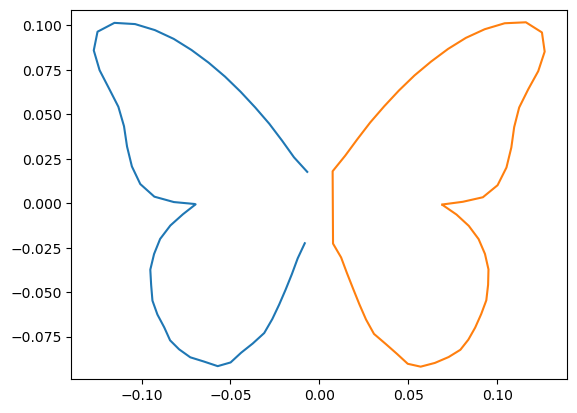

In [4]:
import matplotlib.pyplot as plt
def plot_wings(marks, sp=plt):
    ms = marks.reshape(2,100)
    s = 50
    for n in [0,s]:
        xs = ms[0,n:s+n]
        ys = ms[1,n:s+n]
        sp.plot(xs, ys)
    sp.axis("equal")

plot_wings(X[0])

In [5]:
from ete3 import Tree
ptree = Tree("/var/home/luka/proj/Papilonidae_dataset_v2/papilionidae_tree.txt",format=1)
root = ptree.name
#print(ptree)

In [6]:
npD = np.zeros((N*d, d))

# Create an array of indices
i_indices = np.arange(N*d)
j_indices = np.arange(d)

# Use broadcasting to create a mask
mask = (j_indices[:, None] * N <= i_indices) & (i_indices < (j_indices[:, None] + 1) * N)

npD[mask.T] = 1.0

D = jnp.array(npD)


In [7]:

def ecov(a,b):
    na,nb = names[a],names[b]
    if a == b:
        mrca = ptree.search_nodes(name=names[a])[0]
    else:
        mrca = ptree.get_common_ancestor(na,nb)

    dist = ptree.get_distance(mrca)
    #print(f'{na:>30}\t{nb:>30}\t{mrca.name:>30}\t{dist}\n')

    return dist

npCov = np.empty((N,N))

for i in range(N):
    for j in range(N):
        npCov[i,j] = ecov(i,j)

Cov = jnp.array(npCov)


0.30639999999999995

In [60]:
ls = ptree.get_leaves()
#print(ls[0], type(ls))
i = 0
for n in ptree.traverse("preorder"):
    na = n.name
    m = ls[i]
    if na[0] != 'Q':
        print(na)
        #lna = ls[i]
        #print(na,'\t',rna,'\t',na == rna)
        #print(f'{na:_<30}{len(n.get_ancestors())}')#{lna:_<40}{na==lna}')
        i += 1


Baronia_brevicornis
Iphiclides_podalirius
Graphium_evemon
Graphium_sarpedon
Graphium_agamemnon
Protographium_marcellus
Hypermnestra_helios
Parnassius_orleans
Parnassius_honrathi
Archon_apollinus
Luehdorfia_puziloi
Sericinus_montela
Zerynthia_polyxena
Allancastria_cerisyi
Teinopalpus_imperialis
Battus_polydamas
Battus_belus
Pharmacophagus_antenor
Trogonoptera_brookiana
Troides_rhadamantus
Ornithoptera_richmondia
Euryades_corethrus
Parides_agavus
Parides_photinus
Parides_eurimedes
Cressida_cressida
Byasa_alcinous
Atrophaneura_semperi
Atrophaneura_dixoni
Pachliopta_aristolochiae
Pachliopta_kotzebuea
Losaria_coon
Papilio_aristodemus
Papilio_thoas
Papilio_cresphontes
Papilio_slateri
Papilio_glaucus
Papilio_troilus
Papilio_gigon
Papilio_xuthus
Papilio_polyxenes
Papilio_zelicaon
Papilio_deiphobus
Papilio_protenor
Papilio_polytes
Papilio_phestus
Papilio_ambrax
Meandrusa_sciron


In [91]:
N

48

In [97]:
import re

with open('/var/home/luka/proj/Papilonidae_dataset_v2/papilionidae_tree.txt', 'r') as file:
    txt = file.read()
#print(txt)
#x = re.findall("([A-Z][a-z]+_[a-z]+):(0.[0-9]+)",txt)
R = re.findall("([A-Z][a-z]+_[a-z]+|QS[0-9]+):(0.[0-9]+)([,][(]+|[)])",txt)

#x = re.findall("[A-Z][a-z]+_[a-z]+",txt)
#x = re.findall("QS[0-9]+",txt)



depth = 0


for r in R:
    (name, length, n) = r
    match len(n):
        case 1:
            depth -= 1

        case x:
            depth += x-1



In [104]:
R1 = re.findall("([A-Z][a-z]+_[a-z]+|QS[0-9]+):0.[0-9]+[,][(]+|[)]",txt)
R2 = re.findall("([A-Z][a-z]+_[a-z]+|QS[0-9]+)",txt)

print(len(R1))
print(len(R2))

for r in R2:
    if R1.count(r) == 0:
        print(r)

77
95
Graphium_sarpedon
Graphium_agamemnon
QS1811
QS1810
Protographium_marcellus
QS1808
Parnassius_orleans
Parnassius_honrathi
QS1821
Archon_apollinus
Luehdorfia_puziloi
Zerynthia_polyxena
Allancastria_cerisyi
QS1831
QS1828
QS1825
Battus_polydamas
Battus_belus
Troides_rhadamantus
Ornithoptera_richmondia
QS1840
Parides_photinus
Parides_eurimedes
QS1844
QS1843
QS1842
Cressida_cressida
QS1841
Atrophaneura_semperi
Atrophaneura_dixoni
QS1847
Pachliopta_aristolochiae
Pachliopta_kotzebuea
QS1849
Losaria_coon
QS1848
QS1845
QS1837
QS1836
Papilio_thoas
Papilio_cresphontes
QS1855
Papilio_glaucus
Papilio_troilus
QS1858
QS1856
Papilio_polyxenes
Papilio_zelicaon
QS1866
Papilio_phestus
Papilio_ambrax
QS1872
QS1871
QS1870
QS1868
QS1862
QS1861
QS1852
Meandrusa_sciron
QS1851
QS1833
QS1832
QS1818
QS1804
QS1803


In [112]:


R3 = re.findall("([A-Z][a-z]+_[a-z]+|QS[0-9]+):(0.[0-9]+)([,][(]*|[)])",txt)


M = len(R3)+1

dists2root = np.zeros(M)
#dists2root = {"QS1803":0.0}
includeMask = [True]*M
includeMask[0] = False

i = 1
for (r1,r2,r3) in R3:

    if r1[0] == 'Q':
        dists2root[includeMask] += r3

    else:
        dists2root[i] += r3
        includeMask[i] = False

    match r3:
        case ')':
            # ...
            depth -= 1
        case ',':
            pass
    i += 1

    print(f"{r1:<30}{r2:<20}{r3}")

94
Baronia_brevicornis           0.1711              ,((
Iphiclides_podalirius         0.08472             ,((
Graphium_evemon               0.06883             ,(
Graphium_sarpedon             0.05466             ,
Graphium_agamemnon            0.05188             )
QS1811                        0.01369             )
QS1810                        0.06096             ,
Protographium_marcellus       0.09227             )
QS1808                        0.01315             )
QS1807                        0.0653              ,(((
Hypermnestra_helios           0.04444             ,(
Parnassius_orleans            0.01792             ,
Parnassius_honrathi           0.03123             )
QS1821                        0.0276              )
QS1820                        0.06041             ,((
Archon_apollinus              0.03581             ,
Luehdorfia_puziloi            0.03646             )
QS1826                        0.03388             ,(
Sericinus_montela             0.08969            

In [ ]:
R4 = re.findall("[(]([A-Z][a-z]+_[a-z]+|QS[0-9]+):(0.[0-9]+)[,][(]*|[)])",txt)

struct = (None,None)
first = True

node = struct
for (r1,r2,r3) in R3:



In [138]:
def prn_span_checking(str,i):
    d = 0
    while i < len(str):
        c = str[i]
        if c == '(':
            d += 1
        elif c == ')':
            if d > 0:
                d -= 1
            elif d == 0:
                return (True, i+1)
            else:
                return (False, i)
        i += 1
    return (False, -1)

In [145]:
def prn_span(str,i):
    d = 0
    while i < len(str):
        c = str[i]
        if c == '(':
            d += 1
        elif c == ')':
            if d > 0:
                d -= 1
            elif d == 0:
                return i+1
            else:
                return None
        i += 1
    return None

In [141]:
def get_pstarts(str):
    opens = []
    for i in range(len(str)):
        if str[i] == '(':
            opens.append(i+1)
    return opens

In [150]:
spans = []
os = get_pstarts(txt)

for o in os:
    c = prn_span(txt,o)
    spans.append((o,c))

print(len(spans))

47


In [ ]:


def is_valid(str):
    d = 0
    for i in range(len(str)):
        match str[i]:
            case '(':
                d += 1
            case ')':
                if d > 0:
                    d -= 1
                else:
                    return False

In [123]:
outer = re.compile("\((.+)\)")
m = outer.search(txt)
inner_str = m.group(1)

# find inner pairs
innerre = re.compile("\(([^)]+),([^)]+)\)")

results = innerre.findall(inner_str)
for x,y in results:
    print("%s <-> %s" % (x,y))


(Iphiclides_podalirius:0.08472,((Graphium_evemon:0.06883,(Graphium_sarpedon:0.05466 <-> Graphium_agamemnon:0.05188
((Hypermnestra_helios:0.04444,(Parnassius_orleans:0.01792 <-> Parnassius_honrathi:0.03123
(Archon_apollinus:0.03581 <-> Luehdorfia_puziloi:0.03646
Sericinus_montela:0.08969,(Zerynthia_polyxena:0.02408 <-> Allancastria_cerisyi:0.02345
Teinopalpus_imperialis:0.09583,(((Battus_polydamas:0.0359 <-> Battus_belus:0.04337
Pharmacophagus_antenor:0.07956,(((Trogonoptera_brookiana:0.03698,(Troides_rhadamantus:0.02074 <-> Ornithoptera_richmondia:0.01965
(Euryades_corethrus:0.04833,(Parides_agavus:0.03072,(Parides_photinus:0.02647 <-> Parides_eurimedes:0.02819
(Byasa_alcinous:0.02248,(Atrophaneura_semperi:0.01043 <-> Atrophaneura_dixoni:0.01171
(Pachliopta_aristolochiae:0.00348 <-> Pachliopta_kotzebuea:0.00499
(((Papilio_aristodemus:0.03095,(Papilio_thoas:0.00907 <-> Papilio_cresphontes:0.00884
Papilio_slateri:0.03379,(Papilio_glaucus:0.03012 <-> Papilio_troilus:0.03835
Papilio_gigon:

In [118]:
results

[]

In [61]:
v1 = jnp.ones(N)
evoCov_inv = jnp.linalg.inv(Cov)
tmp = v1.T @ evoCov_inv
mle_r = ((tmp @ v1) **-1) * (tmp @ X)
assert mle_r.shape==(d,)

tmp = X - mle_r.T
mle_R = (((N - 1) ** -1) * tmp.T) @ evoCov_inv @ tmp
assert mle_R.shape==(d,d)

In [62]:
X_mean = jnp.mean(X,axis=0)
evals, evecs = jnp.linalg.eigh(Cov)
X_cent = X - X_mean[None,:]

def ppca_recon(k=2):
    V_k = evecs[:, -k:]
    #print(X_cent.shape,V_k.shape)
    X_reduced = X_cent.T @ V_k
    #print(X_reduced.shape)
    X_reconstructed = X_reduced @ V_k.T + X_mean[:,None]
    #print(X_reconstructed.shape)
    return X_reconstructed

runtime modul

In [64]:
for k in range(1,N+1):
    ppca_recon(k)